In [1]:
# lib manipulasi data
import pandas as pd
import numpy as np

# lib untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# lib praproses data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

1. Data Collections

In [2]:
# load dataset
dataset = pd.read_csv("dataset/BTC-USD update 04-2024.csv", parse_dates=["Date"])
dataset = dataset.set_index("Date")

In [3]:
# show metadataset
print(np.round(
  dataset[["Open","High","Low","Close"]].describe(),0
))

          Open     High      Low    Close
count   3408.0   3408.0   3408.0   3408.0
mean   16502.0  16887.0  16089.0  16518.0
std    17823.0  18248.0  17348.0  17834.0
min      177.0    212.0    172.0    178.0
25%     1403.0   1464.0   1399.0   1445.0
50%     9028.0   9216.0   8809.0   9045.0
75%    27276.0  27799.0  26848.0  27300.0
max    73079.0  73750.0  71334.0  73084.0


In [4]:
# round .3f
dataset = np.round(dataset[["Open","High","Low","Close"]],4)

In [5]:
# show dataset
print(dataset)

                  Open        High         Low       Close
Date                                                      
2015-01-01    320.4350    320.4350    314.0030    314.2490
2015-01-02    314.0790    315.8390    313.5650    315.0320
2015-01-03    314.8460    315.1500    281.0820    281.0820
2015-01-04    281.1460    287.2300    257.6120    264.1950
2015-01-05    265.0840    278.3410    265.0840    274.4740
...                ...         ...         ...         ...
2024-04-26  64485.3711  64789.6562  63322.3984  63755.3203
2024-04-27  63750.9883  63898.3633  62424.7188  63419.1406
2024-04-28  63423.5156  64321.4844  62793.5977  63113.2305
2024-04-29  63106.3633  64174.8789  61795.4570  63841.1211
2024-04-30  63839.4180  64703.3320  59120.0664  60636.8555

[3408 rows x 4 columns]


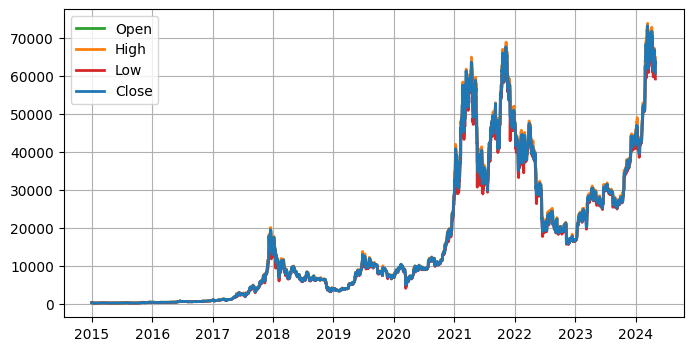

In [6]:
# create frame
fig, ax = plt.subplots(figsize = (8,4))

# time series plot
ax.plot(dataset.index.values, dataset["Open"], color="tab:green", label="Open", linewidth=2)
ax.plot(dataset.index.values, dataset["High"], color="tab:orange", label="High", linewidth=2)
ax.plot(dataset.index.values, dataset["Low"], color="tab:red", label="Low", linewidth=2)
ax.plot(dataset.index.values, dataset["Close"], color="tab:blue", label="Close", linewidth=2)

# set label-labels
ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.legend(loc="best")
ax.grid(True)

plt.show()

2. Data Preprocessing

In [7]:
# # choose features
# data = dataset.filter(['Close'])

In [8]:
# convert dataframe to series close price
data = dataset.values
np.round(data[:3],7)

array([[320.435, 320.435, 314.003, 314.249],
       [314.079, 315.839, 313.565, 315.032],
       [314.846, 315.15 , 281.082, 281.082]])

In [9]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(data))

In [10]:
# show normalize data
scaled_data[:3]

array([[0.0019689 , 0.00147819, 0.00200236, 0.00186743],
       [0.00188172, 0.0014157 , 0.0019962 , 0.00187817],
       [0.00189224, 0.00140633, 0.00153974, 0.0014125 ]])

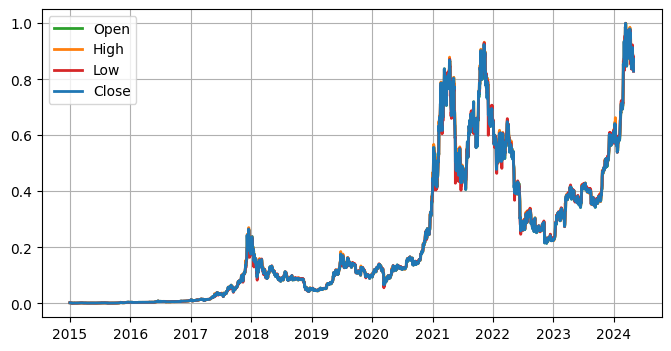

In [11]:
# create frame
fig, ax = plt.subplots(figsize = (8,4))

# time series plot
ax.plot(dataset.index, scaled_data[:,0:1], color="tab:green", label="Open", linewidth=2)
ax.plot(dataset.index, scaled_data[:,1:2], color="tab:orange", label="High", linewidth=2)
ax.plot(dataset.index, scaled_data[:,2:3], color="tab:red", label="Low", linewidth=2)
ax.plot(dataset.index, scaled_data[:,3:4], color="tab:blue", label="Close", linewidth=2)

# set label-labels
ax.set_title("",fontsize=14)
ax.set_xlabel("",fontsize=12)
ax.set_ylabel("",fontsize=12)
ax.legend(loc="best")
ax.grid(True)
plt.show()

3. Results of Preprocessing

In [12]:
# results preprocessing of normalize data
df_normalized = pd.concat([
  pd.DataFrame(dataset.index.values, columns=["Date"]),
  pd.DataFrame(scaled_data, columns=["Open", "High", "Low", "Close"]),
], axis=1)

In [13]:
# show normalize
print(df_normalized)

           Date      Open      High       Low     Close
0    2015-01-01  0.001969  0.001478  0.002002  0.001867
1    2015-01-02  0.001882  0.001416  0.001996  0.001878
2    2015-01-03  0.001892  0.001406  0.001540  0.001413
3    2015-01-04  0.001430  0.001027  0.001210  0.001181
4    2015-01-05  0.001210  0.000906  0.001315  0.001322
...         ...       ...       ...       ...       ...
3403 2024-04-26  0.882116  0.878153  0.887417  0.872051
3404 2024-04-27  0.872043  0.866033  0.874803  0.867440
3405 2024-04-28  0.867551  0.871787  0.879986  0.863244
3406 2024-04-29  0.863201  0.869793  0.865960  0.873228
3407 2024-04-30  0.873256  0.876979  0.828364  0.829277

[3408 rows x 5 columns]


4. Splitting Data

In [14]:
# split data train and test
train_data, test_data = train_test_split(df_normalized["Close"], train_size=0.80, test_size=0.20, shuffle=False)

In [16]:
# function for supervised learning
def create_dataset(look_back, dataset):
    
    # declare variable X and Y
    dataX = []
    dataY = []
    
    # for loop for create supervised learning
    for i in range(look_back, len(dataset)):
        dataX.append(dataset[i-look_back:i, 0])
        dataY.append(dataset[i, 0])
        
    # return value X and Y
    return np.array(dataX), np.array(dataY)

In [17]:
# 4. supervised learning
x_train, y_train = create_dataset(60, np.array(train_data).reshape(-1,1))
x_test, y_test = create_dataset(60, np.array(test_data).reshape(-1,1))

In [18]:
# results preprocessing of normalize data
pd.concat([
  pd.DataFrame(x_train),
  pd.DataFrame(y_train, columns=["Y"])
], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Y
0,0.001867,0.001878,0.001413,0.001181,0.001322,0.001483,0.001594,0.001444,0.001540,0.001326,...,0.000911,0.000794,0.000834,0.000832,0.000814,0.000800,0.001039,0.001045,0.001126,0.001338
1,0.001878,0.001413,0.001181,0.001322,0.001483,0.001594,0.001444,0.001540,0.001326,0.001201,...,0.000794,0.000834,0.000832,0.000814,0.000800,0.001039,0.001045,0.001126,0.001338,0.001421
2,0.001413,0.001181,0.001322,0.001483,0.001594,0.001444,0.001540,0.001326,0.001201,0.001230,...,0.000834,0.000832,0.000814,0.000800,0.001039,0.001045,0.001126,0.001338,0.001421,0.001303
3,0.001181,0.001322,0.001483,0.001594,0.001444,0.001540,0.001326,0.001201,0.001230,0.000655,...,0.000832,0.000814,0.000800,0.001039,0.001045,0.001126,0.001338,0.001421,0.001303,0.001345
4,0.001322,0.001483,0.001594,0.001444,0.001540,0.001326,0.001201,0.001230,0.000655,0.000000,...,0.000814,0.000800,0.001039,0.001045,0.001126,0.001338,0.001421,0.001303,0.001345,0.001298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,0.553805,0.552036,0.542331,0.557546,0.566826,0.565065,0.553447,0.542651,0.539173,0.538934,...,0.407769,0.427850,0.424898,0.411989,0.410585,0.396482,0.386565,0.364644,0.306003,0.302154
2662,0.552036,0.542331,0.557546,0.566826,0.565065,0.553447,0.542651,0.539173,0.538934,0.552500,...,0.427850,0.424898,0.411989,0.410585,0.396482,0.386565,0.364644,0.306003,0.302154,0.307175
2663,0.542331,0.557546,0.566826,0.565065,0.553447,0.542651,0.539173,0.538934,0.552500,0.520392,...,0.424898,0.411989,0.410585,0.396482,0.386565,0.364644,0.306003,0.302154,0.307175,0.277120
2664,0.557546,0.566826,0.565065,0.553447,0.542651,0.539173,0.538934,0.552500,0.520392,0.535804,...,0.411989,0.410585,0.396482,0.386565,0.364644,0.306003,0.302154,0.307175,0.277120,0.278352


In [19]:
# results preprocessing of normalize data
pd.concat([
  pd.DataFrame(x_test),
  pd.DataFrame(y_test, columns=["Y"])
], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Y
0,0.279474,0.280109,0.281632,0.271707,0.286780,0.288779,0.292492,0.285976,0.281973,0.275734,...,0.315288,0.326033,0.326168,0.332276,0.332567,0.331131,0.328630,0.325150,0.317643,0.315952
1,0.280109,0.281632,0.271707,0.286780,0.288779,0.292492,0.285976,0.281973,0.275734,0.273312,...,0.326033,0.326168,0.332276,0.332567,0.331131,0.328630,0.325150,0.317643,0.315952,0.283922
2,0.281632,0.271707,0.286780,0.288779,0.292492,0.285976,0.281973,0.275734,0.273312,0.268932,...,0.326168,0.332276,0.332567,0.331131,0.328630,0.325150,0.317643,0.315952,0.283922,0.287879
3,0.271707,0.286780,0.288779,0.292492,0.285976,0.281973,0.275734,0.273312,0.268932,0.261864,...,0.332276,0.332567,0.331131,0.328630,0.325150,0.317643,0.315952,0.283922,0.287879,0.292928
4,0.286780,0.288779,0.292492,0.285976,0.281973,0.275734,0.273312,0.268932,0.261864,0.261492,...,0.332567,0.331131,0.328630,0.325150,0.317643,0.315952,0.283922,0.287879,0.292928,0.291073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,0.745408,0.780563,0.854898,0.836979,0.854018,0.848384,0.863986,0.934805,0.872680,0.904305,...,0.838053,0.868724,0.873261,0.889047,0.888117,0.914330,0.908426,0.879205,0.882014,0.872051
618,0.780563,0.854898,0.836979,0.854018,0.848384,0.863986,0.934805,0.872680,0.904305,0.915534,...,0.868724,0.873261,0.889047,0.888117,0.914330,0.908426,0.879205,0.882014,0.872051,0.867440
619,0.854898,0.836979,0.854018,0.848384,0.863986,0.934805,0.872680,0.904305,0.915534,0.934389,...,0.873261,0.889047,0.888117,0.914330,0.908426,0.879205,0.882014,0.872051,0.867440,0.863244
620,0.836979,0.854018,0.848384,0.863986,0.934805,0.872680,0.904305,0.915534,0.934389,0.937116,...,0.889047,0.888117,0.914330,0.908426,0.879205,0.882014,0.872051,0.867440,0.863244,0.873228
